Dataset Overview

In [1]:
#models on diabetes dataset
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
data=pd.read_csv("diabetes.csv")
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

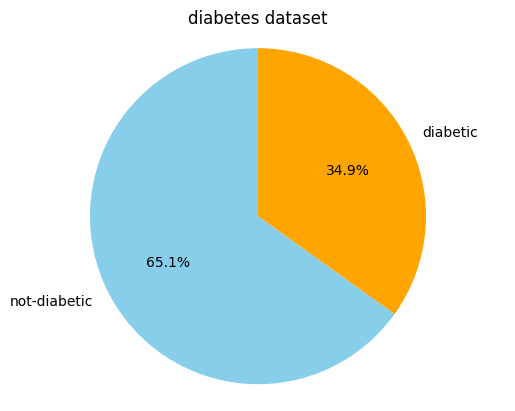

In [2]:
import matplotlib.pyplot as plt

# Sample dataset
labels = ['not-diabetic','diabetic']
sizes = [500,268]
colors = ['skyblue',  'orange']

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Set aspect ratio to be equal so that pie is drawn as a circle
plt.axis('equal')

# Add a title
plt.title('diabetes dataset')

# Show the plot
plt.show()

# Pre-Processing

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
from plotly.subplots import make_subplots
import plotly.express as px
import pandas as pd
import numpy as np

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import EarlyStopping
from mlxtend.preprocessing import minmax_scaling
import tensorflow as tf
from keras import backend as K
from sklearn.utils import class_weight

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
df=pd.read_csv("diabetes.csv")
def median_target(data, var):
    temp = df [df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp
col_with_null = ['Glucose', 'BloodPressure','SkinThickness','Insulin', 'BMI']
def replace_median(data, columns):
    for i in columns:
        f = median_target(data, i)
        display(f)
        data.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = f[[i]].values[0][0]
        data.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = f[[i]].values[1][0]
replace_median(df, col_with_null)

features= [i for i in df]


# outlier
def removeOutliers(df_out, feature, drop=False):

    valueOfFeature = df_out[feature]

    # Q1 (25th percentile) for the given feature
    Q1 = np.percentile(valueOfFeature, 25.)

    # Q3 (75th percentile) for the given feature
    Q3 = np.percentile(valueOfFeature, 75.)

    step = 1.5*(Q3-Q1)

    outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].index.tolist()
    feature_outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].values

    # Remove the outliers, if specified
    print ("Number of outliers (inc duplicates): {} and outliers: {}".format(len(outliers), feature_outliers))
    if drop:
        good_data = df_out.drop(df_out.index[outliers]).reset_index(drop = True)
        print ("New dataset with removed outliers has {} samples with {} features each.".format(*good_data.shape))
        return good_data
    else:
        print ("Nothing happens, df.shape = ",df_out.shape)
        return df_out

df_clean = removeOutliers(df, features[0], True)
df_clean = removeOutliers(df_clean, features[1], True)
df_clean = removeOutliers(df_clean, features[2], True)
df_clean = removeOutliers(df_clean, features[3], True)
df_clean = removeOutliers(df_clean, features[4], True)
df_clean = removeOutliers(df_clean, features[5], True)
df_clean = removeOutliers(df_clean, features[6], True)
df_clean = removeOutliers(df_clean, features[7], True)
df.head(10)
df_clean = removeOutliers(df_clean, features[8], True)

# Pre-processing analysis and base model implementation

In [7]:
#without preprocess
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Read the dataset
#df = pd.read_csv('diabetes.csv')
df=df_clean

# Separate features and labels
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Preprocess data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = [
    RandomForestClassifier(n_estimators=200, random_state=0,max_depth=6),
    LogisticRegression(random_state=0),
    KNeighborsClassifier(n_neighbors=15),
    SVC(kernel='linear')  # Adding SVM model
]

# Define model names for labeling
model_names = [
    'Random Forest',
    'Logistic Regression',
    'K-Nearest Neighbors',
    'SVM'  # Adding SVM model name
]

# Create a list to store maximum accuracies for each model
max_accuracies = []

# Create a list to store best combinations of features for each model
best_combinations = []

# Find the maximum accuracy for each model
for i, model in enumerate(models):
    # Fit the model on the training data
    model.fit(X_train_scaled, y_train)

    # Calculate the initial accuracy on the test set
    initial_accuracy = model.score(X_test_scaled, y_test)
    print(f"Initial Accuracy ({model_names[i]}): {initial_accuracy}")

    # Generate classification report for the model without feature selection
    y_pred = model.predict(X_test_scaled)
    report = classification_report(y_test, y_pred)
    print(f"\nClassification Report ({model_names[i]}) without Feature Selection:")
    print(report)

    # Store the maximum accuracy for the model
    max_accuracies.append(initial_accuracy)





Initial Accuracy (Random Forest): 0.765625

Classification Report (Random Forest) without Feature Selection:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        93
           1       0.60      0.43      0.50        35

    accuracy                           0.77       128
   macro avg       0.70      0.66      0.67       128
weighted avg       0.75      0.77      0.75       128

Initial Accuracy (Logistic Regression): 0.7578125

Classification Report (Logistic Regression) without Feature Selection:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        93
           1       0.57      0.46      0.51        35

    accuracy                           0.76       128
   macro avg       0.69      0.66      0.67       128
weighted avg       0.74      0.76      0.75       128

Initial Accuracy (K-Nearest Neighbors): 0.7734375

Classification Report (K-Nearest Neighbors) without Feature Sele

Initial Accuracy (Random Forest): 0.7693920335429769

Classification Report (Random Forest) without Feature Selection:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       336
           1       0.63      0.52      0.57       141

    accuracy                           0.77       477
   macro avg       0.72      0.70      0.71       477
weighted avg       0.76      0.77      0.76       477

Initial Accuracy (Logistic Regression): 0.7945492662473794

Classification Report (Logistic Regression) without Feature Selection:
              precision    recall  f1-score   support

           0       0.81      0.93      0.86       336
           1       0.74      0.47      0.57       141

    accuracy                           0.79       477
   macro avg       0.77      0.70      0.72       477
weighted avg       0.79      0.79      0.78       477

Initial Accuracy (K-Nearest Neighbors): 0.7421383647798742

Classification Report (K-Nearest Nei

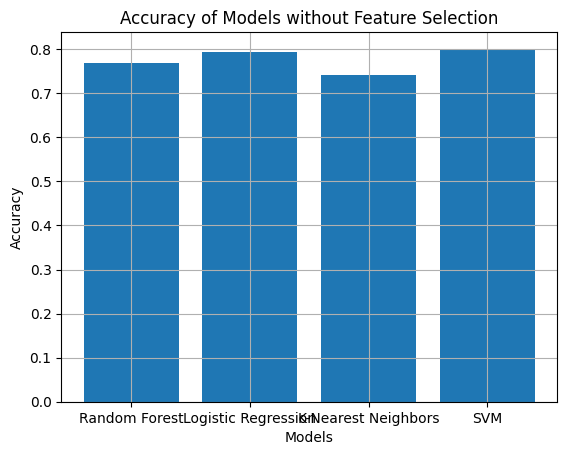

In [5]:
# pre process
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Read the dataset
#df = pd.read_csv('diabetes.csv')
df=df_clean

# Separate features and labels
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=0)

# Preprocess data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = [
    RandomForestClassifier(n_estimators=200, random_state=0,max_depth=6),
    LogisticRegression(random_state=0),
    KNeighborsClassifier(n_neighbors=15),
    SVC(kernel='linear')  # Adding SVM model
]

# Define model names for labeling
model_names = [
    'Random Forest',
    'Logistic Regression',
    'K-Nearest Neighbors',
    'SVM'  # Adding SVM model name
]

# Create a list to store maximum accuracies for each model
max_accuracies = []

# Create a list to store best combinations of features for each model
best_combinations = []

# Find the maximum accuracy for each model
for i, model in enumerate(models):
    # Fit the model on the training data
    model.fit(X_train_scaled, y_train)

    # Calculate the initial accuracy on the test set
    initial_accuracy = model.score(X_test_scaled, y_test)
    print(f"Initial Accuracy ({model_names[i]}): {initial_accuracy}")

    # Generate classification report for the model without feature selection
    y_pred = model.predict(X_test_scaled)
    report = classification_report(y_test, y_pred)
    print(f"\nClassification Report ({model_names[i]}) without Feature Selection:")
    print(report)

    # Store the maximum accuracy for the model
    max_accuracies.append(initial_accuracy)

# Plotting the graph
plt.bar(model_names, max_accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models without Feature Selection')
plt.grid(True)
plt.show()


# Permutation feature selection

Initial Accuracy (Random Forest): 0.7890625

Selected Features (Random Forest) (in descending order of importance):
Glucose: 0.2755708286006595
Age: 0.13980249780443685
BMI: 0.13335701614702128
DiabetesPedigreeFunction: 0.12595120323069844
Pregnancies: 0.09773727951828472
BloodPressure: 0.08868717094376183
SkinThickness: 0.07097951389149464
Insulin: 0.06791448986364283
Maximum Accuracy Combination (r=1): ('SkinThickness',), Accuracy: 71.88%
Maximum Accuracy Combination (r=2): ('BMI', 'Pregnancies'), Accuracy: 75.78%
Maximum Accuracy Combination (r=3): ('Age', 'BMI', 'DiabetesPedigreeFunction'), Accuracy: 78.91%
Maximum Accuracy Combination (r=4): ('Glucose', 'BMI', 'DiabetesPedigreeFunction', 'SkinThickness'), Accuracy: 79.69%
Maximum Accuracy Combination (r=5): ('Glucose', 'Age', 'BMI', 'Pregnancies', 'BloodPressure'), Accuracy: 79.69%
Maximum Accuracy Combination (r=6): ('Glucose', 'Age', 'BMI', 'Pregnancies', 'BloodPressure', 'Insulin'), Accuracy: 81.25%
Maximum Accuracy Combination

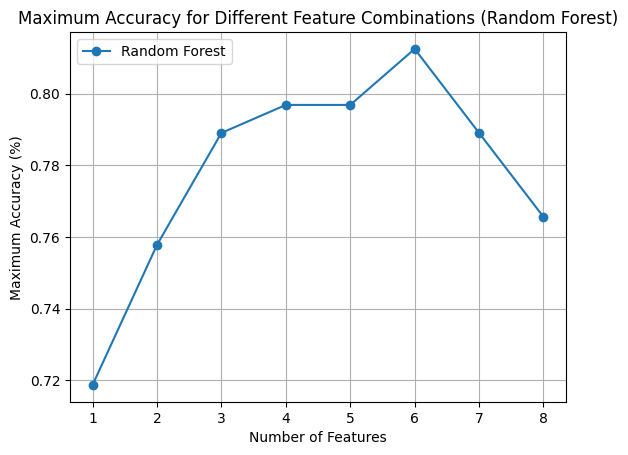


Classification Report (Random Forest) for the Best Feature Combination:
              precision    recall  f1-score   support

           0       0.81      0.88      0.85        93
           1       0.59      0.46      0.52        35

    accuracy                           0.77       128
   macro avg       0.70      0.67      0.68       128
weighted avg       0.75      0.77      0.76       128

Initial Accuracy (Logistic Regression): 0.7578125

Selected Features (Logistic Regression) (in descending order of importance):
Glucose: 4.531741834432616
BMI: 1.9622757249881095
Pregnancies: 1.3089466593408352
DiabetesPedigreeFunction: 1.2103533807205804
Age: 0.8173572021268958
SkinThickness: 0.18144779723318896
BloodPressure: 0.11747135241966927
Insulin: 0.045684767744965854
Maximum Accuracy Combination (r=1): ('Glucose',), Accuracy: 76.56%
Maximum Accuracy Combination (r=2): ('Glucose', 'DiabetesPedigreeFunction'), Accuracy: 77.34%
Maximum Accuracy Combination (r=3): ('Glucose', 'BMI', 'Dia

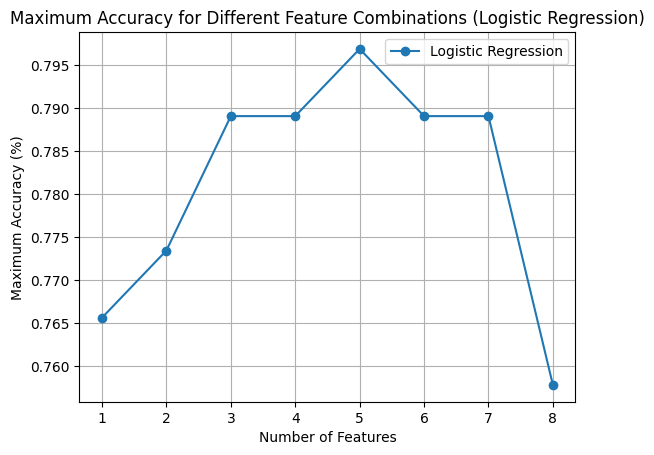


Classification Report (Logistic Regression) for the Best Feature Combination:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        93
           1       0.57      0.46      0.51        35

    accuracy                           0.76       128
   macro avg       0.69      0.66      0.67       128
weighted avg       0.74      0.76      0.75       128

Initial Accuracy (K-Nearest Neighbors): 0.7734375

Selected Features (K-Nearest Neighbors) (in descending order of importance):
Pregnancies: 1.0
Glucose: 1.0
BloodPressure: 1.0
SkinThickness: 1.0
Insulin: 1.0
BMI: 1.0
DiabetesPedigreeFunction: 1.0
Age: 1.0
Maximum Accuracy Combination (r=1): ('Glucose',), Accuracy: 74.22%
Maximum Accuracy Combination (r=2): ('Glucose', 'BloodPressure'), Accuracy: 77.34%
Maximum Accuracy Combination (r=3): ('Glucose', 'BMI', 'Age'), Accuracy: 79.69%
Maximum Accuracy Combination (r=4): ('Pregnancies', 'Glucose', 'BloodPressure', 'Insulin'), Accuracy: 80.47

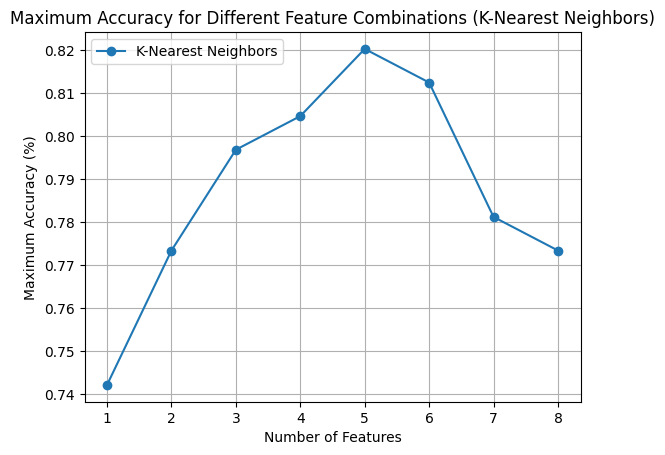


Classification Report (K-Nearest Neighbors) for the Best Feature Combination:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        93
           1       0.61      0.49      0.54        35

    accuracy                           0.77       128
   macro avg       0.71      0.68      0.69       128
weighted avg       0.76      0.77      0.76       128

Initial Accuracy (SVM): 0.7890625

Selected Features (SVM) (in descending order of importance):
Glucose: 4.429142769968353
BMI: 1.6759858057202637
Pregnancies: 1.1259861234544912
DiabetesPedigreeFunction: 1.014924689214719
Age: 0.4201382971966595
BloodPressure: 0.30660929949282334
Insulin: 0.2795249867621541
SkinThickness: 0.22757133577618904
Maximum Accuracy Combination (r=1): ('Glucose',), Accuracy: 76.56%
Maximum Accuracy Combination (r=2): ('Glucose', 'BMI'), Accuracy: 76.56%
Maximum Accuracy Combination (r=3): ('Glucose', 'BMI', 'Pregnancies'), Accuracy: 78.12%
Maximum Accuracy Comb

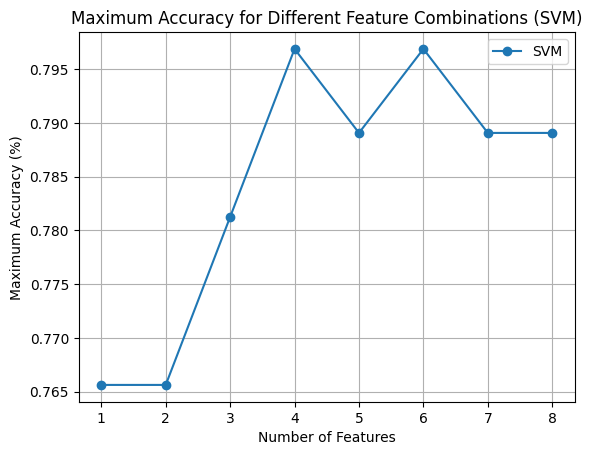


Classification Report (SVM) for the Best Feature Combination:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        93
           1       0.65      0.49      0.56        35

    accuracy                           0.79       128
   macro avg       0.74      0.69      0.71       128
weighted avg       0.78      0.79      0.78       128



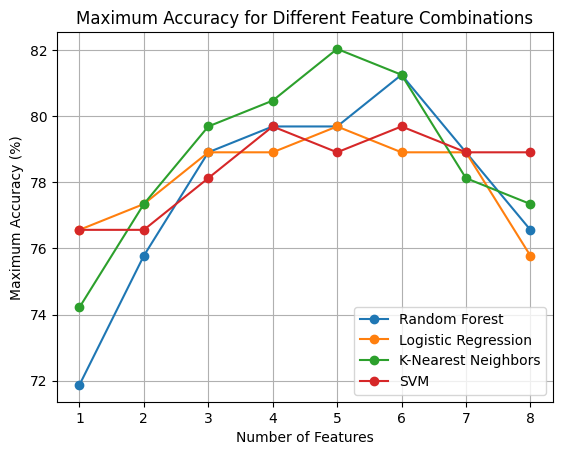

In [8]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Read the dataset
 #df = pd.read_csv('diabetes.csv')
df =df_clean

# Separate features and labels
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Preprocess data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = [
    RandomForestClassifier(n_estimators=100, random_state=0),
    LogisticRegression(random_state=0),
    KNeighborsClassifier(n_neighbors=15),
    SVC(kernel='linear')  # Adding SVM model
]

# Define model names for labeling
model_names = [
    'Random Forest',
    'Logistic Regression',
    'K-Nearest Neighbors',
    'SVM'  # Adding SVM model name
]

# Create a list to store maximum accuracies for each model
max_accuracies = []

# Create a list to store best combinations of features for each model
best_combinations = []

# Find the maximum accuracy for each model
for i, model in enumerate(models):
    # Fit the model on the training data
    model.fit(X_train_scaled, y_train)

    # Calculate the initial accuracy on the test set
    initial_accuracy = model.score(X_test_scaled, y_test)
    print(f"Initial Accuracy ({model_names[i]}): {initial_accuracy}")

    # Get the feature importances or coefficients based on the model type
    if isinstance(model, RandomForestClassifier):
        importance_scores = model.feature_importances_
    elif isinstance(model, LogisticRegression):
        importance_scores = np.abs(model.coef_[0])
    elif isinstance(model, KNeighborsClassifier):
        importance_scores = np.ones(X_train.shape[1])
    elif isinstance(model, SVC):  # Adding SVM importance scores
        importance_scores = np.abs(model.coef_[0])

    # Create a list of feature importances
    feature_importances = list(zip(X.columns, importance_scores))

    # Sort the feature importances in descending order
    feature_importances.sort(key=lambda x: x[1], reverse=True)

    # Print the selected feature names and their importance scores
    print(f"\nSelected Features ({model_names[i]}) (in descending order of importance):")
    for feature, score in feature_importances:
        print(f"{feature}: {score}")

    # Find combinations of important features
    max_combinations = 8  # Maximum number of feature combinations to consider
    x = []
    y = []

    best_accuracy = 0.0
    best_combination = None
    best_combination_accuracy = {}

    for r in range(1, min(max_combinations + 1, len(feature_importances) + 1)):
        combinations = list(itertools.combinations(feature_importances, r))

        best_accuracy_for_r = 0.0
        best_combination_for_r = None

        for combo in combinations:
            selected_features, _ = zip(*combo)
            if len(selected_features) < r:
                continue
            selected_indices = [np.where(X.columns == feature)[0][0] for feature in selected_features]
            X_train_selected = X_train_scaled[:, selected_indices]
            X_test_selected = X_test_scaled[:, selected_indices]
            model.fit(X_train_selected, y_train)
            accuracy = model.score(X_test_selected, y_test)
            if accuracy > best_accuracy_for_r:
                best_accuracy_for_r = accuracy
                best_combination_for_r = selected_features

        x.append(r)
        y.append(best_accuracy_for_r * 100)
        print(f"Maximum Accuracy Combination (r={r}): {best_combination_for_r}, Accuracy: {best_accuracy_for_r * 100:.2f}%")

        # Store the best combination for each specific number of attributes
        if len(best_combination_for_r) == r:
            best_combination = best_combination_for_r
        best_combination_accuracy[best_combination_for_r] = best_accuracy_for_r

    # Store the maximum accuracy and best combination for each model
    max_accuracies.append(y)
    best_combinations.append(best_combination)

    # Store the maximum accuracy for each combination specified in iterations
    max_accuracy_per_iteration = []
    for iteration in range(1, min(max_combinations + 1, len(feature_importances) + 1)):
        max_accuracy_iteration = max([accuracy for combo, accuracy in best_combination_accuracy.items() if len(combo) == iteration])
        max_accuracy_per_iteration.append(max_accuracy_iteration)

    # Plot the maximum accuracy for each combination specified in iterations
    plt.plot(range(1, min(max_combinations + 1, len(feature_importances) + 1)), max_accuracy_per_iteration, marker='o', label=model_names[i])
    plt.xlabel('Number of Features')
    plt.ylabel('Maximum Accuracy (%)')
    plt.title(f'Maximum Accuracy for Different Feature Combinations ({model_names[i]})')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Generate classification report for the best combination of features
    selected_indices = [np.where(X.columns == feature)[0][0] for feature in best_combination]
    X_train_selected = X_train_scaled[:, selected_indices]
    X_test_selected = X_test_scaled[:, selected_indices]
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    report = classification_report(y_test, y_pred)
    print(f"\nClassification Report ({model_names[i]}) for the Best Feature Combination:")
    print(report)

# Plotting the graph
for i in range(len(models)):
    plt.plot(x, max_accuracies[i], marker='o', label=model_names[i])
plt.xlabel('Number of Features')
plt.ylabel('Maximum Accuracy (%)')
plt.title('Maximum Accuracy for Different Feature Combinations')
plt.legend()
plt.grid(True)
plt.show()


# Optimization algorithms

In [9]:
#ACO
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
df = df_clean

# Split the dataset into features and labels
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the pheromone matrix
pheromone = np.ones(X_train.shape[1])

# Initialize the parameters
max_iterations = 30
num_ants = 10
rho = 0.1

# Define the fitness function
def evaluate_features(features, model):
    if len(features) == 0:
        return 0
    model.fit(X_train.iloc[:, features], y_train)
    y_pred = model.predict(X_test.iloc[:, features])
    return accuracy_score(y_test, y_pred)

# Define the models
models = [
    SVC(),
    KNeighborsClassifier(n_neighbors=15),
    RandomForestClassifier(n_estimators=100, random_state=0),
    LogisticRegression(random_state=0)
]

model_names = [
    'SVM',
    'KNN',
    'Random Forest',
    'Logistic Regression'
]

# Perform feature selection using Ant Colony Optimization (ACO)
for i, model in enumerate(models):
    best_solution = None
    best_fitness = 0

    for iteration in range(max_iterations):
        ant_solutions = []
        ant_fitness = []

        # Construct ant solutions
        for ant in range(num_ants):
            features = []
            for j in range(X_train.shape[1]):
                # Calculate the selection probability for each feature
                selection_prob = pheromone[j] / np.sum(pheromone)
                if np.random.rand() < selection_prob:
                    features.append(j)
            ant_solutions.append(features)
            ant_fitness.append(evaluate_features(features, model))

        # Update the pheromone matrix
        pheromone *= (1 - rho)

        for k, ant_solution in enumerate(ant_solutions):
            if ant_fitness[k] > best_fitness:
                best_solution = ant_solution
                best_fitness = ant_fitness[k]

    print(f"\n--- {model_names[i]} ---")
    print(f"Best Fitness: {best_fitness:.4f}")




--- SVM ---
Best Fitness: 0.7500

--- KNN ---
Best Fitness: 0.7734

--- Random Forest ---
Best Fitness: 0.7422

--- Logistic Regression ---
Best Fitness: 0.7578


In [ ]:
# ABC
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score

# Read the dataset
df = df_clean

# Separate features and labels
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Preprocess data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the number of variables/features and the population size
num_variables = X_train_scaled.shape[1]
population_size = 50

# Define the maximum number of iterations
max_iterations = 10

# Define the number of onlooker bees
num_onlooker_bees = population_size // 2

# Define the limit for the abandonment of a food source
limit_abandonment = max_iterations // 10

# Define the function to calculate the fitness/accuracy
def calculate_fitness(solution, algorithm):
    selected_features = np.where(solution == 1)[0]
    if len(selected_features) == 0:
        return 0.0  # If no features selected, return 0 accuracy

    if algorithm == 'knn':
        classifier = KNeighborsClassifier(n_neighbors=15)
    elif algorithm == 'logistic':
        classifier = LogisticRegression(max_iter=100)
    elif algorithm == 'random_forest':
        classifier = RandomForestClassifier(n_estimators=100, random_state=0)
    elif algorithm == 'svm':
        classifier = SVC(kernel='linear', random_state=0)
    else:
        raise ValueError("Invalid algorithm provided!")

    classifier.fit(X_train_scaled[:, selected_features], y_train)
    y_pred = classifier.predict(X_test_scaled[:, selected_features])
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Initialize the population with random solutions
population = np.random.randint(2, size=(population_size, num_variables))

# Initialize the trial limit for each solution
trial_limit = np.zeros(population_size)

# Initialize the best solution and its fitness
best_solution = None
best_fitness = -np.inf

# Iterate through the maximum number of iterations
for iteration in range(max_iterations):
    # Employed bees phase
    for i in range(population_size):
        solution = population[i]

        # Select a different solution randomly
        available_features = np.where(solution == 0)[0]
        if len(available_features) > 0:
            j = np.random.choice(available_features)
            while j == i:
                j = np.random.choice(available_features)

            # Generate a new solution
            new_solution = np.copy(solution)
            new_solution[j] = 1 - new_solution[j]

            # Calculate the fitness of the current and new solution
            fitness = calculate_fitness(solution, 'knn')
            new_fitness = calculate_fitness(new_solution, 'knn')

            # Update the solution and fitness based on the comparison
            if new_fitness > fitness:
                solution = new_solution
                fitness = new_fitness
                trial_limit[i] = 0
            else:
                trial_limit[i] += 1

            # Update the best solution and its fitness
            if fitness > best_fitness:
                best_solution = solution
                best_fitness = fitness

    # Onlooker bees phase
    for _ in range(num_onlooker_bees):
        # Select a solution based on roulette wheel selection
        probabilities = 1 / (1 + trial_limit)
        probabilities /= np.sum(probabilities)
        selected_index = np.random.choice(range(population_size), p=probabilities)
        selected_solution = population[selected_index]

        # Select a different solution randomly
        available_features = np.where(selected_solution == 0)[0]
        if len(available_features) > 0:
            j = np.random.choice(available_features)
            while j == selected_index:
                j = np.random.choice(available_features)

            # Generate a new solution
            new_solution = np.copy(selected_solution)
            new_solution[j] = 1 - new_solution[j]

            # Calculate the fitness of the current and new solution
            fitness = calculate_fitness(selected_solution, 'knn')
            new_fitness = calculate_fitness(new_solution, 'knn')

            # Update the solution and fitness based on the comparison
            if new_fitness > fitness:
                selected_solution = new_solution
                fitness = new_fitness
                trial_limit[selected_index] = 0
            else:
                trial_limit[selected_index] += 1

            # Update the best solution and its fitness
            if fitness > best_fitness:
                best_solution = selected_solution
                best_fitness = fitness

    # Scout bees phase (abandonment of food sources)
    for i in range(population_size):
        if trial_limit[i] >= limit_abandonment:
            population[i] = np.random.randint(2, size=num_variables)
            trial_limit[i] = 0

# Print the best solution and its fitness
print("Best Solution (knn):", best_solution)
print("Best Fitness (knn):", best_fitness)

# Reset the best solution and its fitness
best_solution = None
best_fitness = -np.inf

# Iterate through the maximum number of iterations
for iteration in range(max_iterations):
    # Employed bees phase
    for i in range(population_size):
        solution = population[i]

        # Select a different solution randomly
        available_features = np.where(solution == 0)[0]
        if len(available_features) > 0:
            j = np.random.choice(available_features)
            while j == i:
                j = np.random.choice(available_features)

            # Generate a new solution
            new_solution = np.copy(solution)
            new_solution[j] = 1 - new_solution[j]

            # Calculate the fitness of the current and new solution
            fitness = calculate_fitness(solution, 'logistic')
            new_fitness = calculate_fitness(new_solution, 'logistic')

            # Update the solution and fitness based on the comparison
            if new_fitness > fitness:
                solution = new_solution
                fitness = new_fitness
                trial_limit[i] = 0
            else:
                trial_limit[i] += 1

            # Update the best solution and its fitness
            if fitness > best_fitness:
                best_solution = solution
                best_fitness = fitness

    # Onlooker bees phase
    for _ in range(num_onlooker_bees):
        # Select a solution based on roulette wheel selection
        probabilities = 1 / (1 + trial_limit)
        probabilities /= np.sum(probabilities)
        selected_index = np.random.choice(range(population_size), p=probabilities)
        selected_solution = population[selected_index]

        # Select a different solution randomly
        available_features = np.where(selected_solution == 0)[0]
        if len(available_features) > 0:
            j = np.random.choice(available_features)
            while j == selected_index:
                j = np.random.choice(available_features)

            # Generate a new solution
            new_solution = np.copy(selected_solution)
            new_solution[j] = 1 - new_solution[j]

            # Calculate the fitness of the current and new solution
            fitness = calculate_fitness(selected_solution, 'logistic')
            new_fitness = calculate_fitness(new_solution, 'logistic')

            # Update the solution and fitness based on the comparison
            if new_fitness > fitness:
                selected_solution = new_solution
                fitness = new_fitness
                trial_limit[selected_index] = 0
            else:
                trial_limit[selected_index] += 1

            # Update the best solution and its fitness
            if fitness > best_fitness:
                best_solution = selected_solution
                best_fitness = fitness

    # Scout bees phase (abandonment of food sources)
    for i in range(population_size):
        if trial_limit[i] >= limit_abandonment:
            population[i] = np.random.randint(2, size=num_variables)
            trial_limit[i] = 0

# Print the best solution and its fitness
print("Best Solution (logistic):", best_solution)
print("Best Fitness (logistic):", best_fitness)

# Reset the best solution and its fitness
best_solution = None
best_fitness = -np.inf

# Iterate through the maximum number of iterations
for iteration in range(max_iterations):
    # Employed bees phase
    for i in range(population_size):
        solution = population[i]

        # Select a different solution randomly
        available_features = np.where(solution == 0)[0]
        if len(available_features) > 0:
            j = np.random.choice(available_features)
            while j == i:
                j = np.random.choice(available_features)

            # Generate a new solution
            new_solution = np.copy(solution)
            new_solution[j] = 1 - new_solution[j]

            # Calculate the fitness of the current and new solution
            fitness = calculate_fitness(solution, 'random_forest')
            new_fitness = calculate_fitness(new_solution, 'random_forest')

            # Update the solution and fitness based on the comparison
            if new_fitness > fitness:
                solution = new_solution
                fitness = new_fitness
                trial_limit[i] = 0
            else:
                trial_limit[i] += 1

            # Update the best solution and its fitness
            if fitness > best_fitness:
                best_solution = solution
                best_fitness = fitness

    # Onlooker bees phase
    for _ in range(num_onlooker_bees):
        # Select a solution based on roulette wheel selection
        probabilities = 1 / (1 + trial_limit)
        probabilities /= np.sum(probabilities)
        selected_index = np.random.choice(range(population_size), p=probabilities)
        selected_solution = population[selected_index]

        # Select a different solution randomly
        available_features = np.where(selected_solution == 0)[0]
        if len(available_features) > 0:
            j = np.random.choice(available_features)
            while j == selected_index:
                j = np.random.choice(available_features)

            # Generate a new solution
            new_solution = np.copy(selected_solution)
            new_solution[j] = 1 - new_solution[j]

            # Calculate the fitness of the current and new solution
            fitness = calculate_fitness(selected_solution, 'random_forest')
            new_fitness = calculate_fitness(new_solution, 'random_forest')

            # Update the solution and fitness based on the comparison
            if new_fitness > fitness:
                selected_solution = new_solution
                fitness = new_fitness
                trial_limit[selected_index] = 0
            else:
                trial_limit[selected_index] += 1

            # Update the best solution and its fitness
            if fitness > best_fitness:
                best_solution = selected_solution
                best_fitness = fitness

    # Scout bees phase (abandonment of food sources)
    for i in range(population_size):
        if trial_limit[i] >= limit_abandonment:
            population[i] = np.random.randint(2, size=num_variables)
            trial_limit[i] = 0

# Print the best solution and its fitness
print("Best Solution (random_forest):", best_solution)
print("Best Fitness (random_forest):", best_fitness)

# Reset the best solution and its fitness
best_solution = None
best_fitness = -np.inf

# Iterate through the maximum number of iterations
for iteration in range(max_iterations):
    # Employed bees phase
    for i in range(population_size):
        solution = population[i]

        # Select a different solution randomly
        available_features = np.where(solution == 0)[0]
        if len(available_features) > 0:
            j = np.random.choice(available_features)
            while j == i:
                j = np.random.choice(available_features)

            # Generate a new solution
            new_solution = np.copy(solution)
            new_solution[j] = 1 - new_solution[j]

            # Calculate the fitness of the current and new solution
            fitness = calculate_fitness(solution, 'svm')
            new_fitness = calculate_fitness(new_solution, 'svm')

            # Update the solution and fitness based on the comparison
            if new_fitness > fitness:
                solution = new_solution
                fitness = new_fitness
                trial_limit[i] = 0
            else:
                trial_limit[i] += 1

            # Update the best solution and its fitness
            if fitness > best_fitness:
                best_solution = solution
                best_fitness = fitness

    # Onlooker bees phase
    for _ in range(num_onlooker_bees):
        # Select a solution based on roulette wheel selection
        probabilities = 1 / (1 + trial_limit)
        probabilities /= np.sum(probabilities)
        selected_index = np.random.choice(range(population_size), p=probabilities)
        selected_solution = population[selected_index]

        # Select a different solution randomly
        available_features = np.where(selected_solution == 0)[0]
        if len(available_features) > 0:
            j = np.random.choice(available_features)
            while j == selected_index:
                j = np.random.choice(available_features)

            # Generate a new solution
            new_solution = np.copy(selected_solution)
            new_solution[j] = 1 - new_solution[j]

            # Calculate the fitness of the current and new solution
            fitness = calculate_fitness(selected_solution, 'svm')
            new_fitness = calculate_fitness(new_solution, 'svm')

            # Update the solution and fitness based on the comparison
            if new_fitness > fitness:
                selected_solution = new_solution
                fitness = new_fitness
                trial_limit[selected_index] = 0
            else:
                trial_limit[selected_index] += 1

            # Update the best solution and its fitness
            if fitness > best_fitness:
                best_solution = selected_solution
                best_fitness = fitness

    # Scout bees phase (abandonment of food sources)
    for i in range(population_size):
        if trial_limit[i] >= limit_abandonment:
            population[i] = np.random.randint(2, size=num_variables)
            trial_limit[i] = 0

# Print the best solution and its fitness
print("Best Solution (svm):", best_solution)
print("Best Fitness (svm):", best_fitness)


Best Solution (knn): [1 1 0 0 1 1 0 1]
Best Fitness (knn): 0.8203125
Best Solution (logistic): [1 1 0 1 1 1 0 0]
Best Fitness (logistic): 0.796875
Best Solution (random_forest): [1 1 1 1 1 1 0 1]
Best Fitness (random_forest): 0.8203125
